# Predicting Heart Disease using Machine Learning 

Using various Python-based Machine Learning and Data Science libraries in an attempt to build a machine learning model that can reliably predict whether or not someone has heart disease based on their medical attributes

**Approach**
1. Problem Definition
2. Data
3. Evaluation / Goal
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

**Problem statement:**
> Can we predict whether or not a person has heart disease, given their clinical parameters?

## 2. Data
Cleveland data from UCI Machine Learning Repository : https://archive.ics.uci.edu/dataset/45/heart+disease

## 3. Evaluation / Goal
> Reaching 95% accuracy when predicting the heart diesase by the end of the project.


## 4. Features

**Attributes**
14 attributes used
1. age:  age in years
2. sex:  1 male; 0 female     
3. cp:   chest pain type     
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol:   serum cholestoral in mg/dl   
6. fbs:       (fasting blood sugar 120 mg/dl) (1= true; 0 false)
7. restecg:   resting electrocardiographic results
8. thalach:   maximum heart rate achieved
9. exang:     exercise induced angina (1 yes; 0 no)
10. oldpeak:   ST depression induced by exercise relative to rest
11. slope:    the slope of the peak exercise ST segment 
12. ca:      number of major vessels (0-3) colored by flourosopy  
13. thal:    3 normal; 6 fixed defect; 7 reversable defect  
14. target : l or 0      (the predicted attribute)

## Prepairing the tools

In [1]:
# Import all the tools we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from  sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Loading Data

In [2]:
df = pd.read_csv("../../Datasets/heart-disease.csv")
df.shape

(303, 14)

# Exploratory Data Analysis

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your dad()

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

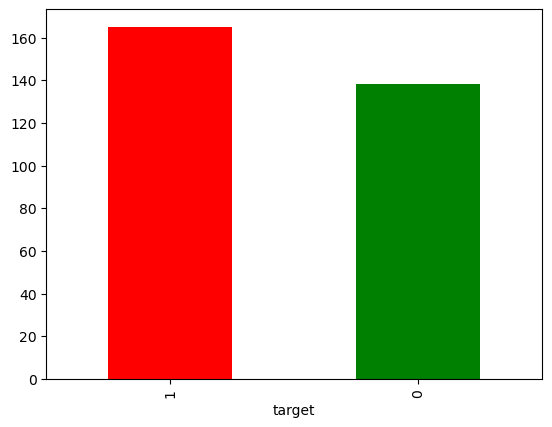

In [9]:
df["target"].value_counts().plot(kind="bar", color=["red","green"])
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


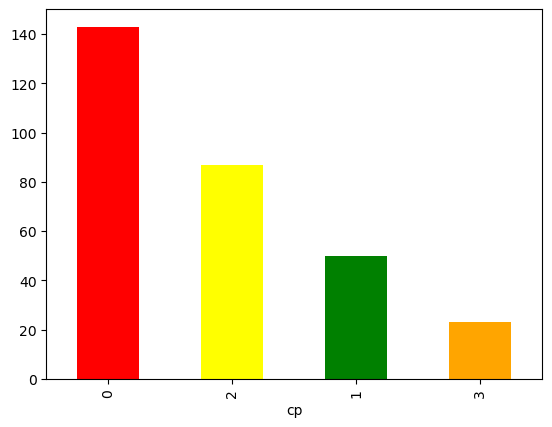

In [11]:
df["cp"].value_counts().plot(kind="bar", color=["red","yellow","green","orange"])
plt.show()

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Finding patterns

### Comparing Heart disease and Sex 

In [13]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [14]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


> Women have about 75% chance of having a hearty diesase

> Men have about 45% chance of having a heart disease


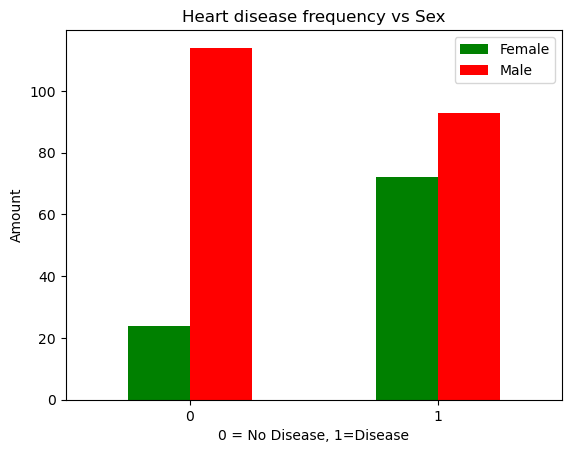

In [15]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", color=["Green","red"])
plt.title("Heart disease frequency vs Sex")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
plt.show()

### Age distribution

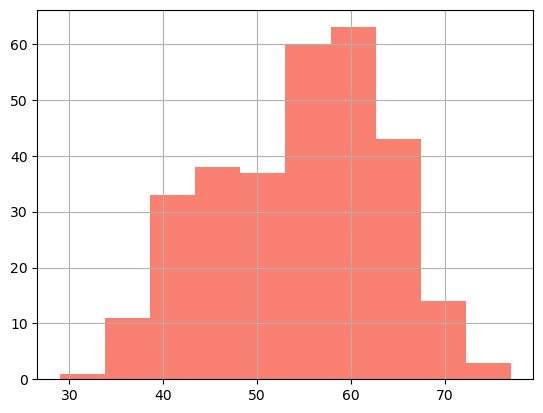

In [16]:
df["age"].hist(bins=10, color ="salmon")
plt.show()

### Age vs Maximum heart rate for Heart disease

In [17]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

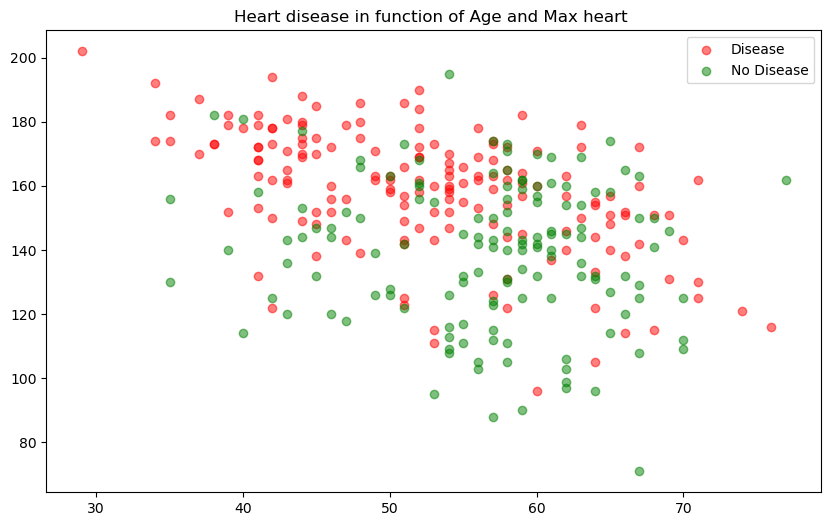

In [18]:
plt.figure(figsize=(10,6))

plt.scatter(df["age"][df["target"]==1], df["thalach"][df["target"]==1], color="red", alpha = 0.5)
plt.scatter(df["age"][df["target"]==0], df["thalach"][df["target"]==0], color="green", alpha=0.5)
plt.title("Heart disease in function of Age and Max heart ")
plt.legend(["Disease","No Disease"])
plt.show()

### Age vs Heart Disease scatter plot

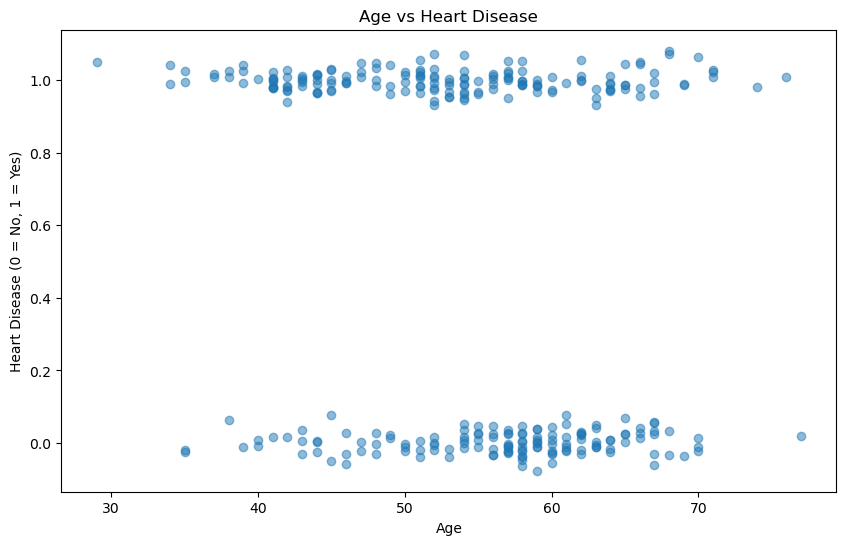

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df["age"], df["target"] + np.random.normal(0, 0.03, size=len(df)), alpha=0.5)
plt.title("Age vs Heart Disease")
plt.xlabel("Age")
plt.ylabel("Heart Disease (0 = No, 1 = Yes)")
plt.show()

### Heart Disease frequency vs Chest Pain type

In [20]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [21]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


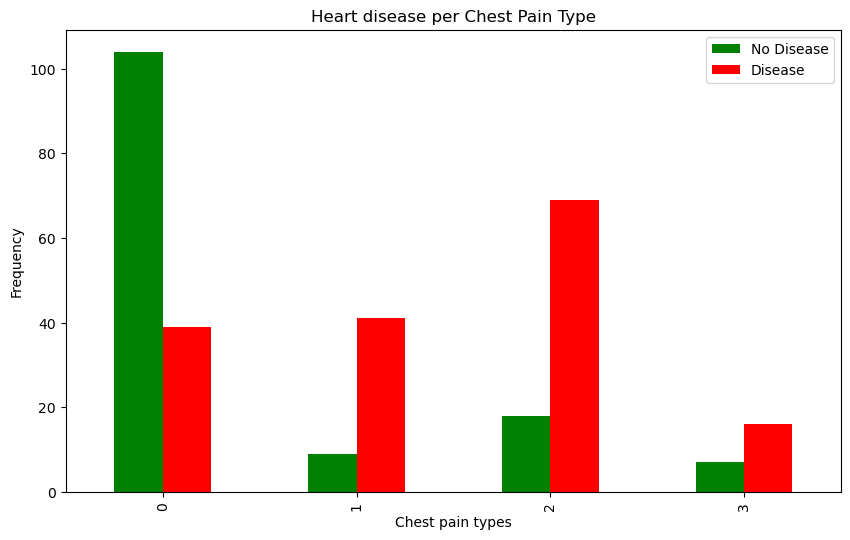

In [22]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color =["green","red"])
plt.title("Heart disease per Chest Pain Type")
plt.xlabel("Chest pain types")
plt.ylabel("Frequency")
plt.legend(["No Disease","Disease"])
plt.show()

### Correlation matrix

In [23]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


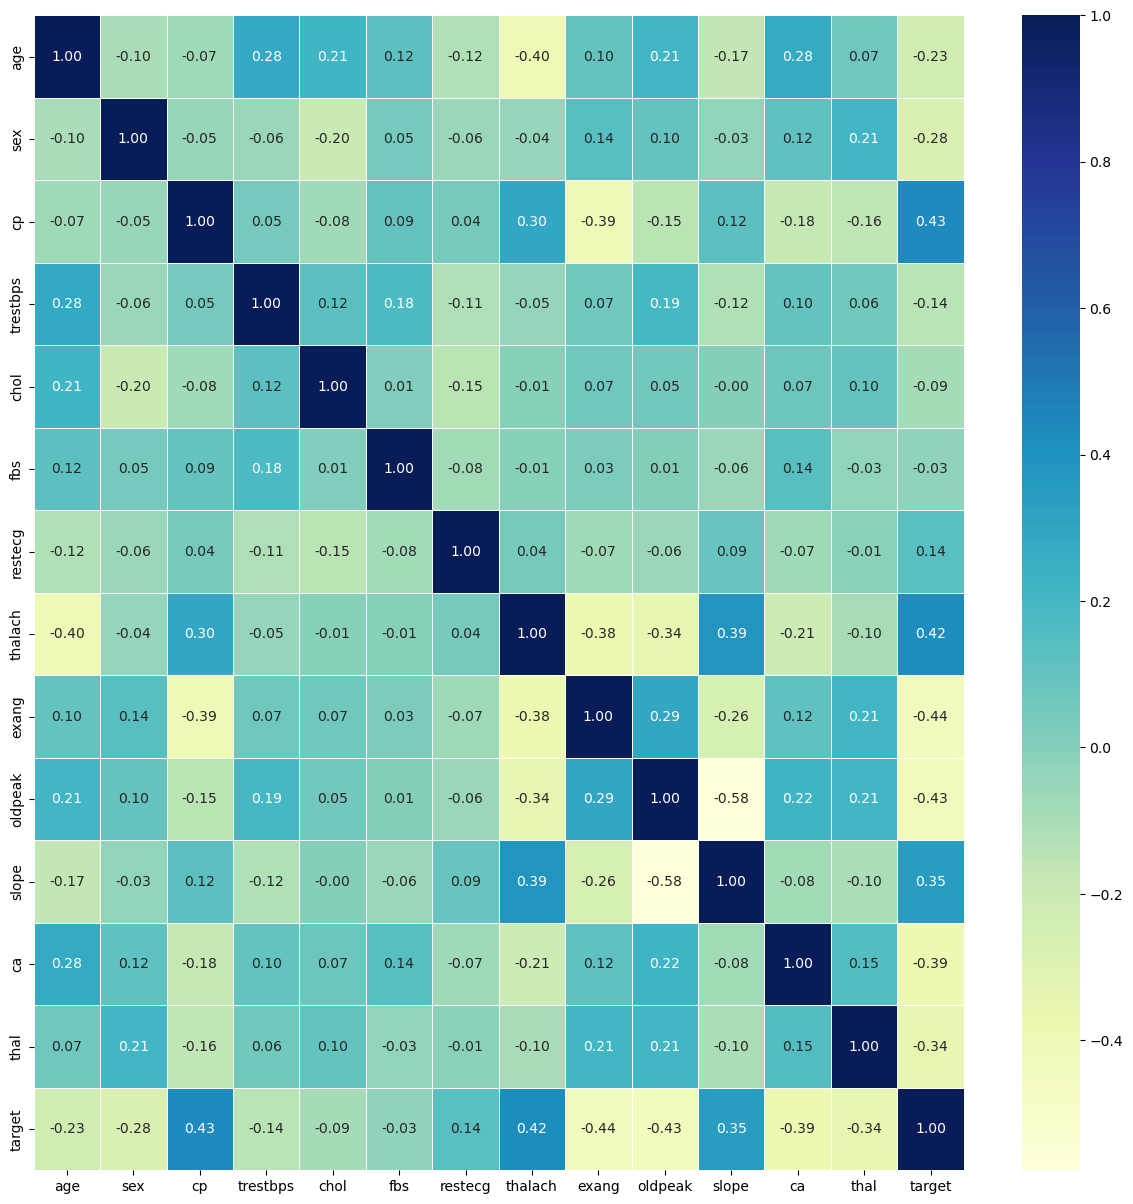

In [24]:
# Using heatmap for better visualization
corr_matrix = df.corr()
fig, ax =plt.subplots(figsize=(15,15))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")
plt.show()

Exang has very high negative correlation with Heart disease

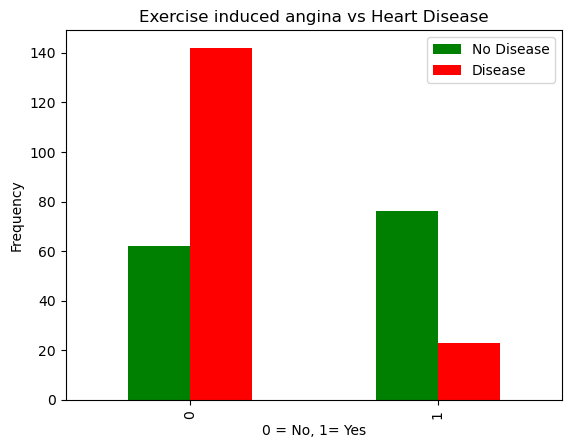

In [25]:
# Exang vs heart disease
pd.crosstab(df["exang"], df["target"]).plot(kind="bar", color=["Green","Red"])
plt.legend(["No Disease","Disease"])
plt.title("Exercise induced angina vs Heart Disease")
plt.xlabel("0 = No, 1= Yes")
plt.ylabel("Frequency")
plt.show()

## Modelling

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
# Splitting data into features and target
X=df.drop("target", axis =1)
y=df["target"]


# Train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

### Model Choosing
1. Logistic regression
2. K Nearest Neighbors classifier
3. Random Forest Classifier

In [28]:
# putting models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(n_neighbors=3),
          "Random Forest": RandomForestClassifier(random_state=42)}

# Function a function to fit and evaluate models
def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_metrics={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        y_preds=model.predict(X_test)
        metrics={
            "Accuracy":model.score(X_test,y_test),
            "Precision":precision_score(y_test,y_preds),
            "F1":f1_score(y_test,y_preds),
            "Recall":recall_score(y_test,y_preds)
        }
        model_metrics[name]=metrics
    return model_metrics

In [29]:
model_metrics = fit_and_evaluate(models = models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_metrics

C:\Users\shiva\.conda\envs\HeartDisease_project1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': {'Accuracy': 0.8524590163934426,
  'Precision': 0.8571428571428571,
  'F1': 0.8695652173913043,
  'Recall': 0.8823529411764706},
 'KNN': {'Accuracy': 0.5409836065573771,
  'Precision': 0.59375,
  'F1': 0.5757575757575758,
  'Recall': 0.5588235294117647},
 'Random Forest': {'Accuracy': 0.7868852459016393,
  'Precision': 0.8181818181818182,
  'F1': 0.8059701492537313,
  'Recall': 0.7941176470588235}}

### Model Comparison

In [30]:
np.random.seed(42)
model_comparison = pd.DataFrame(model_metrics).T
model_comparison

,Accuracy,Precision,F1,Recall
Logistic Regression,0.852459,0.857143,0.869565,0.882353
KNN,0.540984,0.593750,0.575758,0.558824
Random Forest,0.786885,0.818182,0.805970,0.794118


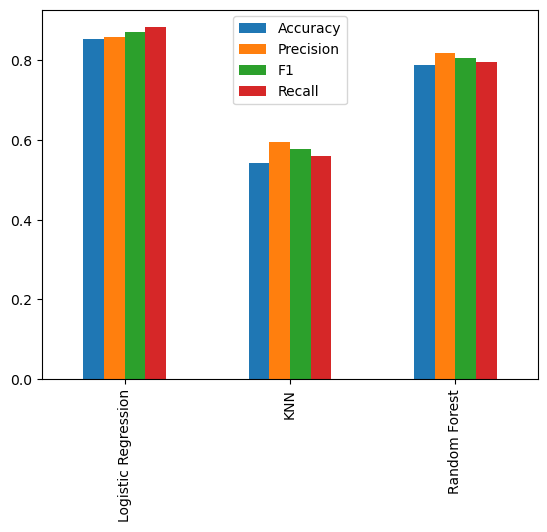

In [31]:
model_comparison.plot(kind="bar")
plt.show()

We will try improving models by:
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross Validation
* Evaluation metrics (Prec, recall, f1, classificatn report, ROC curve, Area Under the curve)

**KNN**

In [32]:
train_scores = []
test_scores = []

# List of different values for n_neighbor
neighbours = range(1,21)
for i in neighbours:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    print(f"Neighbours = {i} , Accuracy = {knn.score(X_test,y_test)*100:.2f}")

Neighbours = 1 , Accuracy = 54.10
Neighbours = 2 , Accuracy = 52.46
Neighbours = 3 , Accuracy = 54.10
Neighbours = 4 , Accuracy = 49.18
Neighbours = 5 , Accuracy = 54.10
Neighbours = 6 , Accuracy = 57.38
Neighbours = 7 , Accuracy = 60.66
Neighbours = 8 , Accuracy = 55.74
Neighbours = 9 , Accuracy = 57.38
Neighbours = 10 , Accuracy = 55.74
Neighbours = 11 , Accuracy = 60.66
Neighbours = 12 , Accuracy = 60.66
Neighbours = 13 , Accuracy = 59.02
Neighbours = 14 , Accuracy = 60.66
Neighbours = 15 , Accuracy = 59.02
Neighbours = 16 , Accuracy = 59.02
Neighbours = 17 , Accuracy = 60.66
Neighbours = 18 , Accuracy = 59.02
Neighbours = 19 , Accuracy = 59.02
Neighbours = 20 , Accuracy = 59.02


In [33]:
train_scores

[1.0,
 0.8347107438016529,
 0.8223140495867769,
 0.7933884297520661,
 0.7975206611570248,
 0.8016528925619835,
 0.7520661157024794,
 0.7603305785123967,
 0.7272727272727273,
 0.7520661157024794,
 0.71900826446281,
 0.7355371900826446,
 0.7231404958677686,
 0.7107438016528925,
 0.7272727272727273,
 0.7231404958677686,
 0.7107438016528925,
 0.7066115702479339,
 0.7231404958677686,
 0.7066115702479339]

In [34]:
test_scores

[0.5409836065573771,
 0.5245901639344263,
 0.5409836065573771,
 0.4918032786885246,
 0.5409836065573771,
 0.5737704918032787,
 0.6065573770491803,
 0.5573770491803278,
 0.5737704918032787,
 0.5573770491803278,
 0.6065573770491803,
 0.6065573770491803,
 0.5901639344262295,
 0.6065573770491803,
 0.5901639344262295,
 0.5901639344262295,
 0.6065573770491803,
 0.5901639344262295,
 0.5901639344262295,
 0.5901639344262295]

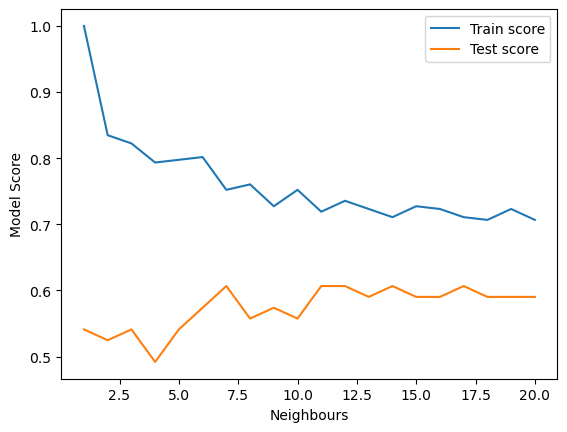

Max KNN Score on test data: 60.66%


In [35]:
plt.plot(neighbours,train_scores, label="Train score")
plt.plot(neighbours,test_scores, label = "Test score")
plt.xlabel("Neighbours")
plt.ylabel("Model Score")
plt.legend()
plt.show()

print(f"Max KNN Score on test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV
Tuning:
* Logistic Regression
* Random Forest Classifier

In [36]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver": ["liblinear"]}

rf_grid={"n_estimators": np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

In [37]:
# Tuning Logistic regression

np.random.seed(42)

rs_LR = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=log_reg_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

#fitting hyperparameter searh models 
rs_LR.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
# Finding best params
rs_LR.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [39]:
# Score
rs_LR.score(X_test,y_test)

0.8360655737704918

In [40]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

#fitting hyperparameter searh models 
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
rs_rf.best_params_
# old best
# {'n_estimators': 910,
#  'min_samples_split': 18,
#  'min_samples_leaf': 1,
#  'max_depth': 10}

{'n_estimators': 260,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_depth': None}

In [42]:
rs_rf.score(X_test,y_test)
# old best
# 0.9016393442622951

0.8360655737704918

In [43]:
np.random.seed(42)
best_rf=RandomForestClassifier(n_estimators = 910,
                               min_samples_split = 18,
                               min_samples_leaf = 1,
                               max_depth = 10,
                              random_state = 42)
best_rf.fit(X_train, y_train)
best_rf.score(X_test,y_test)

0.8524590163934426

The accuracy of this model improved significantly (by about 4 %)

In [44]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
model = {"RandomizedSearchCV RandomForest": rs_rf}
val=fit_and_evaluate(model,X_train,X_test,y_train,y_test)
rs_rf_metrics = pd.DataFrame(val).T
# rs_rf_metrics.plot().bar()

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [45]:
val

{'RandomizedSearchCV RandomForest': {'Accuracy': 0.8360655737704918,
  'Precision': 0.8529411764705882,
  'F1': 0.8529411764705882,
  'Recall': 0.8529411764705882}}

In [46]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_depth': None}

### Grid Search CV to imrpove RandomForest algo

In [47]:
## GridSearchCV
np.random.seed(42)
rf_gs_grid={"n_estimators": np.arange(10,1000,100),
        "max_depth":[5,10],
         "min_samples_split":[2,6,10,14,18],
        "min_samples_leaf":[1,5,9,15,19]}
gs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_gs_grid,
                           cv=5,
                           verbose=True)
model={"GridSearchCV":gs_rf}
gs_rf_metrics=fit_and_evaluate(model,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


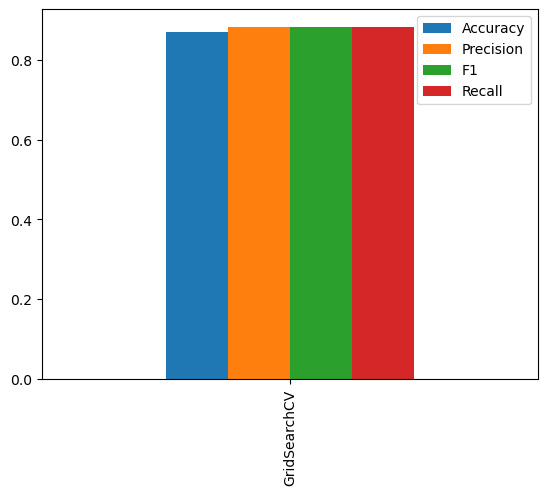

              Accuracy  Precision        F1    Recall
GridSearchCV  0.868852   0.882353  0.882353  0.882353


{'GridSearchCV': {'Accuracy': 0.8688524590163934,
  'Precision': 0.8823529411764706,
  'F1': 0.8823529411764706,
  'Recall': 0.8823529411764706}}

In [48]:
val1=pd.DataFrame(gs_rf_metrics).T
val1
val1.plot(kind="bar")
plt.show()
print(val1)
gs_rf_metrics

### Tuning Logistic Regression using GridSearchCV

In [49]:
np.random.seed(42)
gs_log_grid = { "C" : np.logspace(-4,4,30),
               "solver":["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=gs_log_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [50]:
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [51]:
gs_log_reg.score(X_test,y_test)

0.8360655737704918

In [52]:
model = {"Logistic regression (GridSearch)":gs_log_reg}
gs_lr_metrics=fit_and_evaluate(model,X_train,X_test,y_train,y_test)
gs_lr_metrics

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'Logistic regression (GridSearch)': {'Accuracy': 0.8360655737704918,
  'Precision': 0.8333333333333334,
  'F1': 0.8571428571428571,
  'Recall': 0.8823529411764706}}

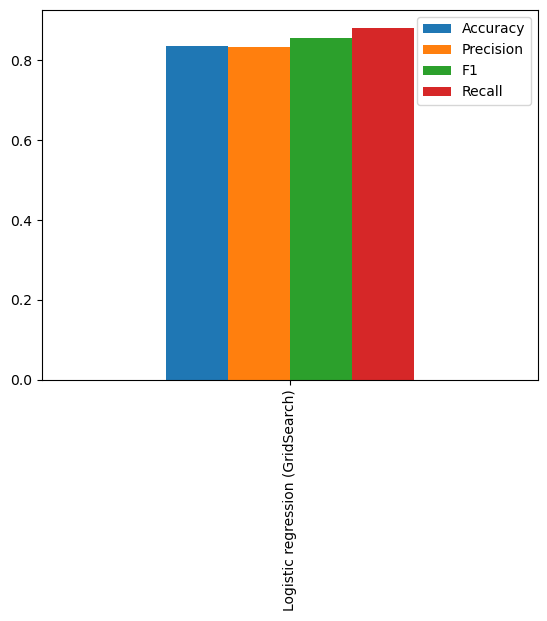

                                  Accuracy  Precision        F1    Recall
Logistic regression (GridSearch)  0.836066   0.833333  0.857143  0.882353


In [53]:
val2 = pd.DataFrame(gs_lr_metrics).T
val2.plot(kind="bar")
plt.show()
print(val2)

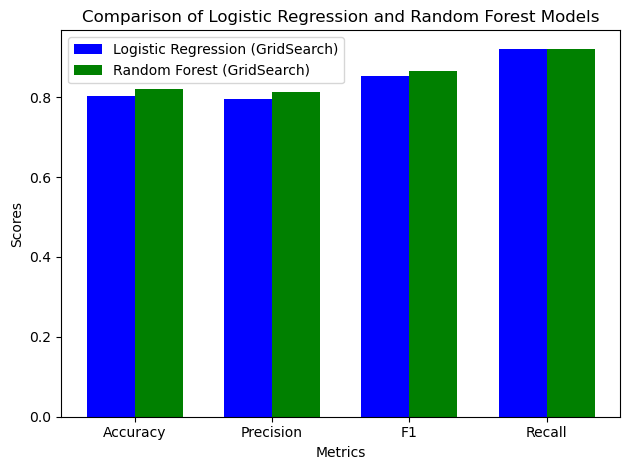

In [54]:
metrics = ['Accuracy', 'Precision', 'F1', 'Recall']
lr_values = [0.8032786885245902, 0.7954545454545454, 0.8536585365853658, 0.9210526315789473]
rf_values = [0.819672131147541, 0.813953488372093, 0.8641975308641975, 0.9210526315789473]

bar_width = 0.35
index = np.arange(len(metrics))

fig, ax = plt.subplots()
lr_bar = ax.bar(index, lr_values, bar_width, label='Logistic Regression (GridSearch)', color='b')
rf_bar = ax.bar(index + bar_width, rf_values, bar_width, label='Random Forest (GridSearch)', color='g')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Logistic Regression and Random Forest Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

**Random forest is overall better than Logistic regression and KNN**

But the scores still dont match the goal

### Confusion matrix

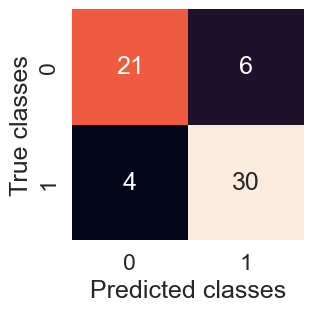

In [55]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
def plot_conf_mat(y_test, y_preds):
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    
    plt.xlabel("Predicted classes")
    plt.ylabel("True classes")
    plt.show()

y_preds_lr=gs_log_reg.predict(X_test)
plot_conf_mat(y_test, y_preds_lr)

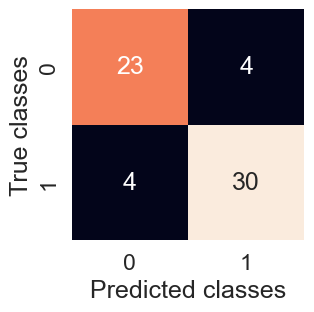

In [56]:
y_preds_rf=gs_rf.predict(X_test)
plot_conf_mat(y_test, y_preds_rf)

### Plotting ROC Curve and calculating area under curve

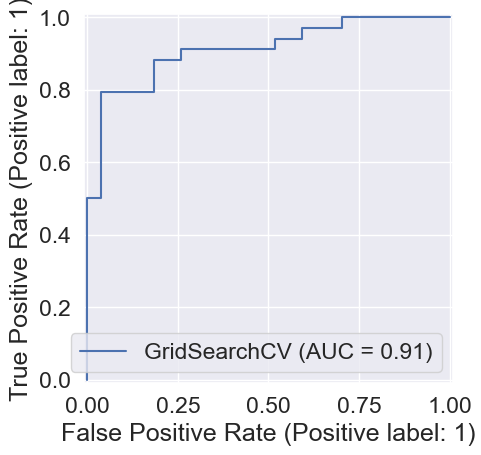

In [57]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

### Calculating evaluation metrics using cross validation
* Precision, recall, f1, accuracy using `cross_val_score`

In [58]:
# Check best parameters
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [59]:
gs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [60]:
# Creating new classifiers with best parameters
lr=LogisticRegression(C= 0.1082636733874054, solver= 'liblinear')
rf=RandomForestClassifier(n_estimators= 710,
                         min_samples_split= 10,
                         min_samples_leaf= 9,
                         max_depth = 10)

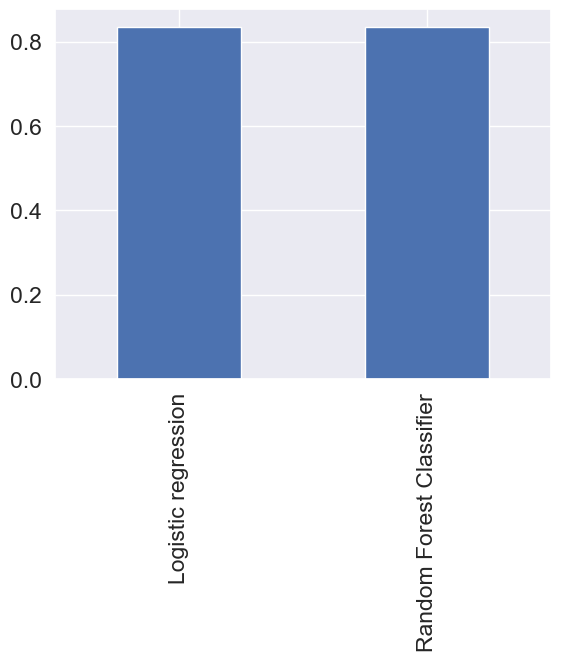

{'Logistic regression': 0.834808743169399, 'Random Forest Classifier': 0.8348633879781421}


In [75]:
# Cross-validated accuracy
acc_lr = cross_val_score(lr,X,y,cv=5,scoring ='accuracy')
acc_lr=np.mean(acc_lr)
acc_rf = cross_val_score(rf,X,y,cv=5,scoring ='accuracy')
acc_rf=np.mean(acc_rf)

vals={"Logistic regression": acc_lr,
     "Random Forest Classifier": acc_rf}

acc_comp=pd.DataFrame(vals,index=["Accuracy"])
acc_comp.T.plot(kind="bar", legend=False);

plt.show()
print(vals)

In [ ]:
# Cross-validated precision
p_lr = cross_val_score(lr,X,y,cv=5,scoring ='precision')
p_lr=np.mean(acc_lr)
p_rf = cross_val_score(rf,X,y,cv=5,scoring ='precision')
p_rf=np.mean(acc_rf)

valp={"Logistic regression": p_lr,
     "Random Forest Classifier": p_rf}

p_comp=pd.DataFrame(vals,index=["Precision"])
p_comp.T.plot(kind="bar", legend=False);

plt.show()
print(valp)

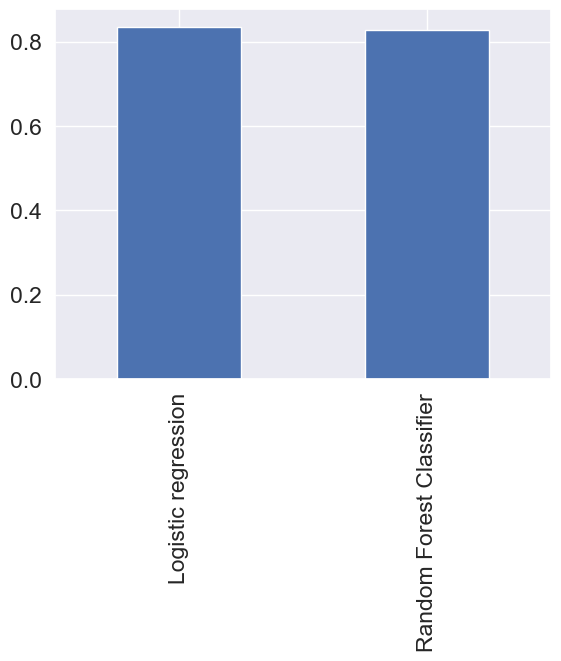

{'Logistic regression': 0.834808743169399, 'Random Forest Classifier': 0.8283060109289618}


In [63]:
# Cross-validated recall
r_lr = cross_val_score(lr,X,y,cv=5,scoring ='recall')
r_lr=np.mean(acc_lr)
r_rf = cross_val_score(rf,X,y,cv=5,scoring ='recall')
r_rf=np.mean(acc_rf)

valr={"Logistic regression": r_lr,
     "Random Forest Classifier": r_rf}

r_comp=pd.DataFrame(vals,index=["Recall"])
r_comp.T.plot(kind="bar", legend=False);

plt.show()
print(valr)

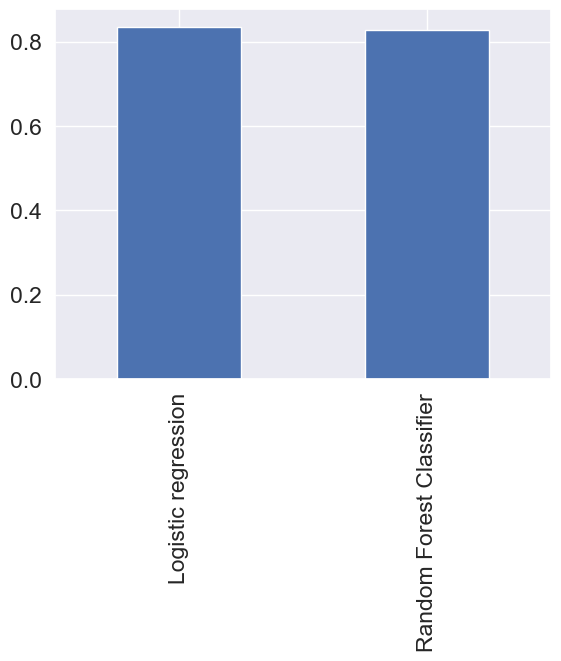

{'Logistic regression': 0.834808743169399, 'Random Forest Classifier': 0.8283060109289618}


In [64]:
# Cross-validated f1 score
import warnings
warnings.filterwarnings('ignore')


f1_lr = cross_val_score(lr,X,y,cv=5,scoring ='f1_samples')
f1_lr=np.mean(acc_lr)
f1_rf = cross_val_score(rf,X,y,cv=5,scoring ='f1_samples')
f1_rf=np.mean(acc_rf)

valf1={"Logistic regression": acc_lr,
     "Random Forest Classifier": acc_rf}

acc_comp=pd.DataFrame(vals,index=["F1_score"])
acc_comp.T.plot(kind="bar", legend=False);

plt.show()

print(valf1)

**Logistic regression gives better results overall.**

## Feature importance
What features contribute most to the model and how.
1. Search MODEL_NAME feature importance

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
clf=lr
clf.fit(X_train,y_train)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [67]:
# Checking coef_
clf.coef_

array([[ 0.01077535, -0.66609976,  0.57715094, -0.01912462, -0.00170733,
         0.01192596,  0.26581577,  0.02735181, -0.37214159, -0.5126978 ,
         0.26473185, -0.52591193, -0.52422615]])

In [68]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.010775350150743818,
 'sex': -0.6660997612692031,
 'cp': 0.5771509429032968,
 'trestbps': -0.019124622448868103,
 'chol': -0.0017073263073663692,
 'fbs': 0.011925964330217816,
 'restecg': 0.26581576798771295,
 'thalach': 0.027351805566793713,
 'exang': -0.37214158806133685,
 'oldpeak': -0.5126977959735325,
 'slope': 0.2647318501083853,
 'ca': -0.525911933968546,
 'thal': -0.5242261464739265}

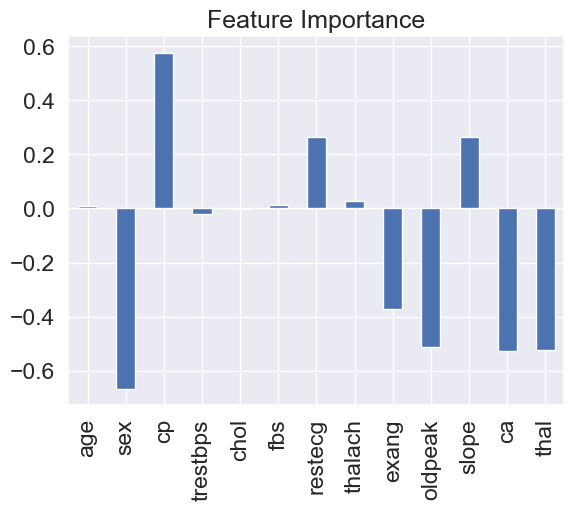

In [69]:
feature_df = pd.DataFrame(feature_dict, index=[0]).T
feature_df.plot.bar(title = "Feature Importance", legend=False)
plt.show()

In [70]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [71]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [72]:
pd.crosstab(df.ca,df.target)

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


In [73]:
pd.crosstab(df.thal,df.target)

target,0,1
thal,,
0,1,1
1,12,6
2,36,130
3,89,28


**Our project goal wasnt met, hence i will try updating this project after learning about more classification models and how to use them**